# Proyecto 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
#Configuraciones de visualización
np.set_printoptions(suppress = True)

#Cargando data
datos = np.load('Data/proyecto_training_data.npy')

#Escalando precio
datos[0:, 0] = datos[0:, 0] / 1000

#Datos de entrenamiento - 80%
datosEntrenamiento = datos[0 : int(len(datos) * 0.80), ]

#Datos de prueba - 20%
datosPrueba = datos[int(len(datos) * 0.80): , ]

dfEntrenamiento = pd.DataFrame(datosEntrenamiento, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dfPrueba = pd.DataFrame(datosPrueba, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

dfEntrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208.500,7.0,856.0,8.0,2003.0,65.0
1,181.500,6.0,1262.0,6.0,1976.0,80.0
2,223.500,7.0,920.0,6.0,2001.0,68.0
3,140.000,7.0,961.0,7.0,1915.0,60.0
4,250.000,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108.959,4.0,1258.0,6.0,1969.0,60.0
1164,194.000,5.0,1432.0,5.0,1978.0,NaN
1165,233.170,7.0,1502.0,7.0,2009.0,79.0
1166,245.350,8.0,1694.0,7.0,2008.0,64.0


In [225]:
# Datos estadísticos

dfDatosEstadisticos = pd.DataFrame()

media = pd.Series(np.nanmean(datos, axis = 0), name = 'Media')
maximo = pd.Series(np.nanmax(datos, axis = 0), name = 'Máximo')
minimo = pd.Series(np.nanmin(datos, axis = 0), name = 'Mínimo')
rango = pd.Series(np.nanmax(datos, axis = 0) - np.nanmin(datos, axis = 0), name = 'Rango')
desviacion = pd.Series(np.nanstd(datos, axis = 0), name = 'Desviación')

dfDatosEstadisticos = dfDatosEstadisticos.append(media)
dfDatosEstadisticos = dfDatosEstadisticos.append(maximo)
dfDatosEstadisticos = dfDatosEstadisticos.append(minimo)
dfDatosEstadisticos = dfDatosEstadisticos.append(rango)
dfDatosEstadisticos = dfDatosEstadisticos.append(desviacion)

dfDatosEstadisticos.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

dfDatosEstadisticos

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
Media,180.921196,6.099315,1162.626712,6.517808,1971.267808,70.049958
Máximo,755.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Mínimo,34.900000,1.000000,334.000000,2.000000,1872.000000,21.000000
Rango,720.100000,9.000000,4358.000000,12.000000,138.000000,292.000000
Desviación,79.415292,1.382523,386.455322,1.624837,30.192559,24.274639


Text(0.5, 1.0, 'Sale Price (Thousand $)')

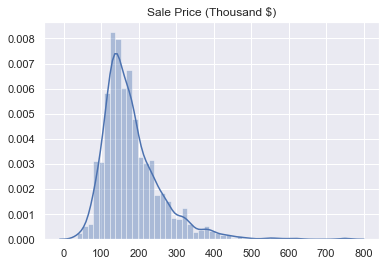

In [230]:
#Histogramas

sns.set()

y = datos[:,0]
x1 = datos[:,1]
x2 = datos[:,2]
x3 = datos[:,3]
x4 = datos[:,4]
nan_x5 = np.isnan(datos[:,5])
not_nan_x5 = ~nan_x5
x5 = datos[:,5][not_nan_x5]

h1 = sns.distplot(y, hist=True)
h1.set_title('Sale Price (Thousand $)')

Text(0.5, 1.0, 'Overall Quality')

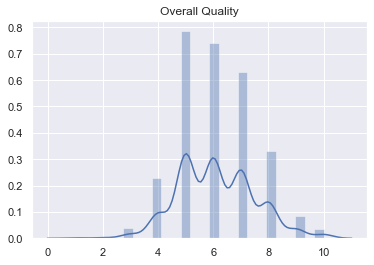

In [227]:
h2 = sns.distplot(x1, hist=True)
h2.set_title('Overall Quality')

Text(0.5, 1.0, '1st Floor Square Feet')

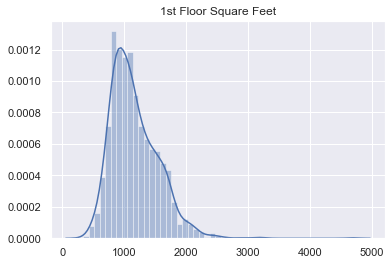

In [6]:
h3 = sns.distplot(x2, hist=True)
h3.set_title('1st Floor Square Feet')

Text(0.5, 1.0, 'Total Rooms')

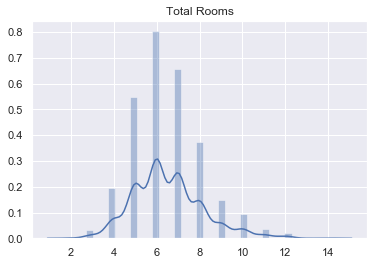

In [228]:
h4 = sns.distplot(x3, hist=True)
h4.set_title("Total Rooms")

Text(0.5, 1.0, 'Year Built')

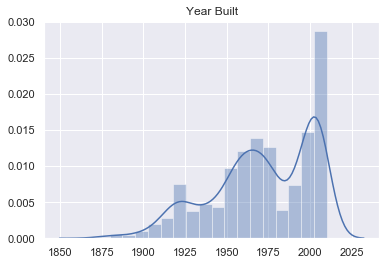

In [8]:
h5 = sns.distplot(x4, hist=True)
h5.set_title('Year Built')

Text(0.5, 1.0, 'Lot Frontage')

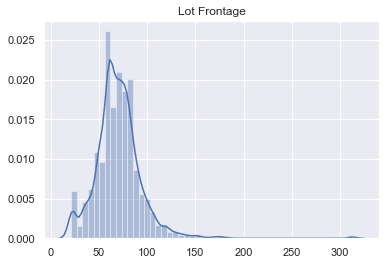

In [9]:
h6 = sns.distplot(x5, hist=True)
h6.set_title('Lot Frontage')

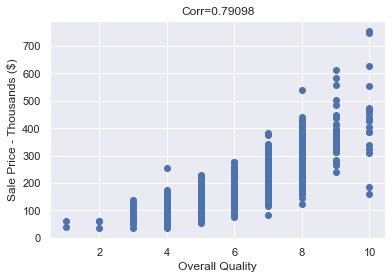

In [232]:
#Correlación

corrcoef_x1_y = round(np.corrcoef(x1,y)[0, 1], 5)
corrcoef_x2_y = round(np.corrcoef(x2,y)[0, 1], 5)
corrcoef_x3_y = round(np.corrcoef(x3,y)[0, 1], 5)
corrcoef_x4_y = round(np.corrcoef(x4,y)[0, 1], 5)
y5 = datos[:,0][not_nan_x5]
corrcoef_x5_y = round(np.corrcoef(x5,y5)[0, 1],5)

plt.scatter(x1, y)
plt.title('Corr=' + str(corrcoef_x1_y))
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price - Thousands ($)')
plt.show()

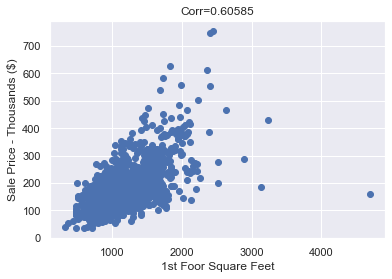

In [233]:
plt.scatter(x2, y)
plt.title('Corr=' + str(corrcoef_x2_y))
plt.xlabel('1st Foor Square Feet')
plt.ylabel('Sale Price - Thousands ($)')
plt.show()

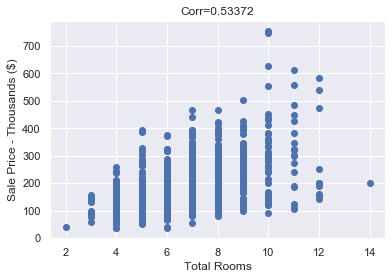

In [234]:
plt.scatter(x3, y)
plt.title('Corr=' + str(corrcoef_x3_y))
plt.xlabel('Total Rooms')
plt.ylabel('Sale Price - Thousands ($)')
plt.show()

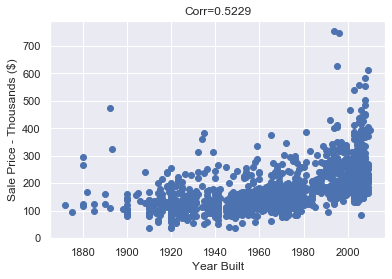

In [235]:
plt.scatter(x4, y)
plt.title('Corr=' + str(corrcoef_x4_y))
plt.xlabel('Year Built')
plt.ylabel('Sale Price - Thousands ($)')
plt.show()

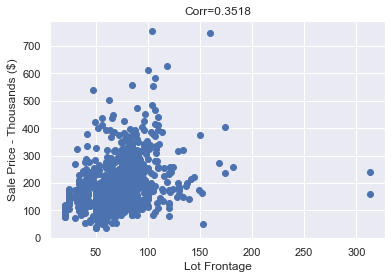

In [236]:
plt.scatter(x5, y5)
plt.title('Corr=' + str(corrcoef_x5_y))
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price - Thousands ($)')
plt.show()

In [239]:
#Función de entrenamiento

def entrenar(x, y, EPOCHS, imprimir_error_cada, lr):
    
    observacion = np.matrix([x, np.ones_like(x)])
    observacion = observacion.transpose()
    
    m = 0.1
    b = 0.2
    parametro = np.array([m, b])
    
    modelo = np.array([])
    errores = np.array([])
    
    for i in range(1,EPOCHS):
        #Calculando yhat = mx + b
        yhat = np.matmul(observacion, parametro)
        yhat = np.asarray(yhat).reshape(-1)
        
        #Calculando error
        error = (1 / 2) * np.mean(np.power((y - yhat), 2))    
        errores = np.append(errores, error)

        #Calculando gradientes
        gradiente_m = np.mean((yhat - y) * x)
        gradiente_b = np.mean((yhat - y))
        
        #Actualizando parámetros
        m -= lr * gradiente_m
        b -= lr * gradiente_b
        parametro = np.array([m, b])

        if i % imprimir_error_cada != 0:
            continue

        print("Error:",error)

    print(errores)
    print("----------------------------")
    print("Error final:",error)

In [241]:
entrenar(x1, y, 10, 1, 0.5)

Error: 19364.753168197945
Error: 6498197.882783675
Error: 2353407305.98067
Error: 852502239814.5438
Error: 308812035692012.1
Error: 1.1186466039587389e+17
Error: 4.052206779278628e+19
Error: 1.4678791071212635e+22
Error: 5.317273255010671e+24
[1.93647532e+04 6.49819788e+06 2.35340731e+09 8.52502240e+11
 3.08812036e+14 1.11864660e+17 4.05220678e+19 1.46787911e+22
 5.31727326e+24]
----------------------------
Error final: 5.317273255010671e+24
